In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris #기본으로 제공되는 데이터셋
iris_dataset=load_iris()

In [3]:
print("iris_dateset의 키:\n",iris_dataset.keys())

iris_dateset의 키:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_dataset['DESCR'][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [17]:
print("타깃의 이름:",iris_dataset['target_names'])
print("특성의 이름:",iris_dataset['feature_names'])
print("data의 타입:",type(iris_dataset['data']))
print("data의 크기:",iris_dataset['data'].shape)
print("data의 처음 다섯행:\n",iris_dataset['data'][:5])

타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 타입: <class 'numpy.ndarray'>
data의 크기: (150, 4)
data의 처음 다섯행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [16]:
print("target의 타입",type(iris_dataset['target']))
print("target의 크기",iris_dataset['target'].shape)
print("타깃:\n",iris_dataset['target'])

target의 타입 <class 'numpy.ndarray'>
target의 크기 (150,)
타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [23]:
print("X_train의 크기",X_train.shape)#train은 약 75%
print("y_train의 크기",y_train.shape)
print("X_test의 크기",X_test.shape)#test는 약 25%
print("y_test의 크기",y_test.shape)

X_train의 크기 (112, 4)
y_train의 크기 (112,)
X_test의 크기 (38, 4)
y_test의 크기 (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7db7433f50>,
      dtype=object)

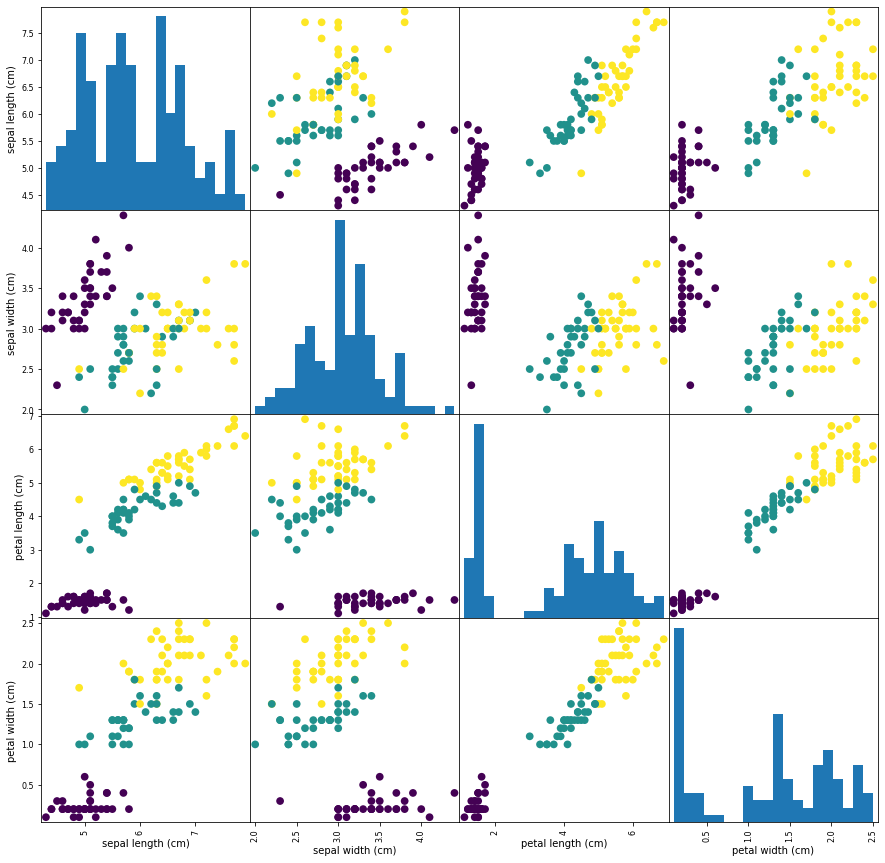

In [24]:
#X_train 데이터를 사용하여 데이터 프레임을 만듬
#열 이름은 iris_dataset,feature_names에 잇는 문자열 사용
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
#데이터프레임을 사용하여 y_train에 따라 색으로 구분된 산점도행렬 만듬
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                           hist_kwds={'bins':20}, s=60, alpha=8)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape:",X_new.shape)

X_new.shape: (1, 4)


In [30]:
prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [31]:
y_pred = knn.predict(X_test)
print("테스트에 대한 예측값:\n", y_pred)

테스트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [32]:
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도 : 0.97
